# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
X_test.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
118,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81


In [19]:
y_pred = lr.predict(X_test).round(1)

In [20]:
y_pred[:10]

array([[27.1],
       [23. ],
       [27. ],
       [34.7],
       [22.9],
       [21.3],
       [15.7],
       [23.7],
       [24.9],
       [18.9]])

In [21]:
y_test[:10]

,MEDV
81,23.9
453,17.8
311,22.1
291,37.3
360,25.0
50,19.7
127,16.2
35,18.9
252,29.6
442,18.4


## 3. Calculate and print R-squared for both the training and the testing set.

In [23]:
metrics.r2_score(y_test, y_pred).round(3)

0.633

In [24]:
y_pred_fake = lr.predict(X_train).round(1)

In [25]:
y_pred_fake[:10]

array([[27. ],
       [13.4],
       [17. ],
       [22.6],
       [15.6],
       [25.3],
       [22.9],
       [23.5],
       [36.2],
       [22.1]])

In [26]:
y_train[:10]

,MEDV
287,23.2
466,19.0
17,17.5
184,26.4
18,20.2
218,21.5
44,21.2
312,19.4
97,38.7
479,21.4


In [27]:
metrics.r2_score(y_train, y_pred_fake).round(3)

0.761

In [28]:
# the train one is like 10% more accurate than the test, still pretty shitty tho

## 4. Calculate and print mean squared error for both the training and the testing set.

In [30]:
metrics.mean_squared_error(y_test, y_pred).round(3)
# test

27.24

In [33]:
metrics.mean_squared_error(y_train, y_pred_fake).round(3)
# train

20.802

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [34]:
metrics.mean_absolute_error(y_test, y_pred).round(3)
# test

3.629

In [35]:
metrics.mean_absolute_error(y_train, y_pred_fake).round(3)
# train

3.216

## Classification Model Evaluation

In [76]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [77]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [78]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [80]:
y['class'].unique()

array([0, 1, 2])

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [82]:
log = LogisticRegression()

In [83]:
log.fit(
    X_train,
    y_train
)

/home/jorge_solana/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jorge_solana/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
y_pred_fake = log.predict(X_train)

In [85]:
y_pred_fake[:5]

array([0, 0, 1, 2, 1])

In [86]:
y_pred = log.predict(X_test)

In [87]:
y_pred[:5]

array([1, 2, 1, 2, 0])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [110]:
df_final = X_test.join(y_test)

In [111]:
df_final["class_pred"] = y_pred

In [112]:
df_final.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_pred
66,5.6,3.0,4.5,1.5,1,1
114,5.8,2.8,5.1,2.4,2,2
93,5.0,2.3,3.3,1.0,1,1
101,5.8,2.7,5.1,1.9,2,2
3,4.6,3.1,1.5,0.2,0,0


In [115]:
df_final["correct"] = df_final['class'] == df_final.class_pred

In [117]:
df_final.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_pred,correct
125,7.2,3.2,6.0,1.8,2,2,True
147,6.5,3.0,5.2,2.0,2,2,True
67,5.8,2.7,4.1,1.0,1,1,True
55,5.7,2.8,4.5,1.3,1,1,True
31,5.4,3.4,1.5,0.4,0,0,True


In [118]:
accuracy = df_final.correct.sum() / df_final.shape[0]

In [119]:
accuracy

1.0

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(y_train, log.predict(X_train))

0.975

In [123]:
accuracy_score(y_test, log.predict(X_test))

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [125]:
from sklearn.metrics import balanced_accuracy_score

In [126]:
balanced_accuracy_score(y_test, log.predict(X_test))

1.0

In [127]:
balanced_accuracy_score(y_train, log.predict(X_train))

0.9736842105263158

## 10. Calculate and print the precision score for both the training and the testing set.

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [141]:
precision_score(
    y_true = y_test,
    y_pred = log.predict(X_test),
    average = "macro"
)

1.0

In [142]:
precision_score(
    y_true = y_train,
    y_pred = log.predict(X_train),
    average = "macro"
)

0.9767441860465116

## 11. Calculate and print the recall score for both the training and the testing set.

In [140]:
recall_score(
    y_true=y_test,
    y_pred= log.predict(X_test),
    average = "macro"
)

1.0

In [143]:
recall_score(
    y_true=y_train,
    y_pred= log.predict(X_train),
    average = "macro"
)

0.9736842105263158

## 12. Calculate and print the F1 score for both the training and the testing set.

In [144]:
f1_score(
    y_true=y_test,
    y_pred=log.predict(X_test),
    average='macro'
)

1.0

In [145]:
f1_score(
    y_true=y_train,
    y_pred=log.predict(X_train),
    average='macro'
)

0.9742531770919293

## 13. Generate confusion matrices for both the training and the testing set.

In [153]:
pd.crosstab(y_test['class'],  log.predict(X_test))

col_0,0,1,2
class,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [154]:
pd.crosstab(y_train['class'],  log.predict(X_train))

col_0,0,1,2
class,,,
0,42,0,0
1,0,35,3
2,0,0,40


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [181]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=666, max_depth=3)
cross_validate(clf, X, y, cv=5)['test_score'].mean()

0.9733333333333334

In [183]:
from sklearn import tree
iris = load_iris() 
X, y = iris.data, iris.target
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, y)

In [184]:
cross_validate(clf2, X, y, cv=5)['test_score'].mean()

0.9666666666666668

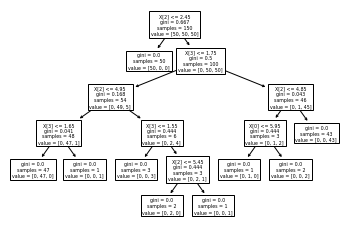

In [186]:
tree.plot_tree(clf2);